In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

In [15]:

print("="*80)
print("MANUFACTURING EQUIPMENT OUTPUT PREDICTION - LINEAR REGRESSION ANALYSIS")
print("="*80)

MANUFACTURING EQUIPMENT OUTPUT PREDICTION - LINEAR REGRESSION ANALYSIS


In [17]:
#Loading Dataset
df = pd.read_csv('manufacturing_dataset_1000_samples.csv')

In [19]:
#Drop features
features_to_remove = ['Ambient_Temperature', 'Maintenance_Hours', 'Machine_Utilization']
df.drop(columns=features_to_remove, inplace=True)
print("Updated DataFrame columns:", df.columns)


Updated DataFrame columns: Index(['Timestamp', 'Injection_Temperature', 'Injection_Pressure',
       'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Machine_Age',
       'Operator_Experience', 'Shift', 'Machine_Type', 'Material_Grade',
       'Day_of_Week', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time',
       'Efficiency_Score', 'Parts_Per_Hour'],
      dtype='object')


In [21]:
print("\n" + "="*50)
print("STEP 1: DATA LOADING AND INITIAL EXPLORATION")
print("="*50)

print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())


STEP 1: DATA LOADING AND INITIAL EXPLORATION

Dataset Shape: (1000, 16)
Rows: 1000, Columns: 16

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Machine_Age                 1000 non-null   float64
 7   Operator_Experience         980 non-null    float64
 8   Shift                       1000 non-null   object 
 9   Machine_Type                1000 non-null   object 
 10  Material_Grade              1000 non-null   object 
 11  Day_of_Week                 1000 non

In [23]:
print("\n" + "="*50)
print("STEP 2: DATA EXPLORATION AND UNDERSTANDING")
print("="*50)



STEP 2: DATA EXPLORATION AND UNDERSTANDING


In [25]:
# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")


Missing Values:
Material_Viscosity     20
Operator_Experience    20
dtype: int64


In [27]:
# Basic statistics for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns: {len(numerical_cols)}")
print(numerical_cols)

print("\nSummary Statistics for Numerical Variables:")
print(df[numerical_cols].describe().round(2))


Numerical columns: 11
['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Machine_Age', 'Operator_Experience', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Parts_Per_Hour']

Summary Statistics for Numerical Variables:
       Injection_Temperature  Injection_Pressure  Cycle_Time  Cooling_Time  \
count                1000.00             1000.00     1000.00       1000.00   
mean                  215.32              116.08       35.85         11.92   
std                    12.00               14.67        8.35          2.30   
min                   180.00               80.00       16.30          8.00   
25%                   207.20              105.90       28.80         10.28   
50%                   215.30              115.95       36.85         11.90   
75%                   222.80              125.93       45.00         13.50   
max                   300.00              150.00       60.00         19.90   

   

In [29]:
# Median imputation for missing values
df['Material_Viscosity'].fillna(df['Material_Viscosity'].median(), inplace=True)
df['Operator_Experience'].fillna(df['Operator_Experience'].median(), inplace=True)

print(df[['Material_Viscosity', 'Operator_Experience']].isnull().sum())


Material_Viscosity     0
Operator_Experience    0
dtype: int64


In [31]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Timestamp' in categorical_cols:
    categorical_cols.remove('Timestamp')

print(f"\nCategorical columns: {len(categorical_cols)}")
print(categorical_cols)

if categorical_cols:
    print("\nCategorical Variables Distribution:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())


Categorical columns: 4
['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']

Categorical Variables Distribution:

Shift:
Shift
Day        517
Evening    277
Night      206
Name: count, dtype: int64

Machine_Type:
Machine_Type
Type_A    384
Type_B    347
Type_C    269
Name: count, dtype: int64

Material_Grade:
Material_Grade
Standard    591
Premium     210
Economy     199
Name: count, dtype: int64

Day_of_Week:
Day_of_Week
Friday       168
Wednesday    155
Thursday     150
Saturday     141
Tuesday      138
Monday       136
Sunday       112
Name: count, dtype: int64


In [33]:
#Encoding Categorical Variables

#One-Hot Encoding
df = pd.get_dummies(df, columns=['Shift','Machine_Type','Day_of_Week'], drop_first=True)

#Ordinal Encoding
mapping = {'Economy':1, 'Standard':2, 'Premium':3}
df['Material_Grade'] = df['Material_Grade'].map(mapping)


In [35]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Timestamp' in categorical_cols:
    categorical_cols.remove('Timestamp')

print(f"\nCategorical columns: {len(categorical_cols)}")
print(categorical_cols)

if categorical_cols:
    print("\nCategorical Variables Distribution:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())


Categorical columns: 0
[]


In [37]:
#Scaling Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Injection_Temperature','Injection_Pressure','Cycle_Time','Cooling_Time',
            'Material_Viscosity','Machine_Age',
            'Operator_Experience','Temperature_Pressure_Ratio',
            'Total_Cycle_Time','Efficiency_Score']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [39]:
print("\n" + "="*50)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*50)


STEP 3: EXPLORATORY DATA ANALYSIS


In [41]:
# Set target variable
target_variable = 'Parts_Per_Hour'
feature_cols = [col for col in numerical_cols if col != target_variable and col != 'Timestamp']

print(f"\nTarget Variable: {target_variable}")
print(f"Feature Variables: {len(feature_cols)}")


Target Variable: Parts_Per_Hour
Feature Variables: 10


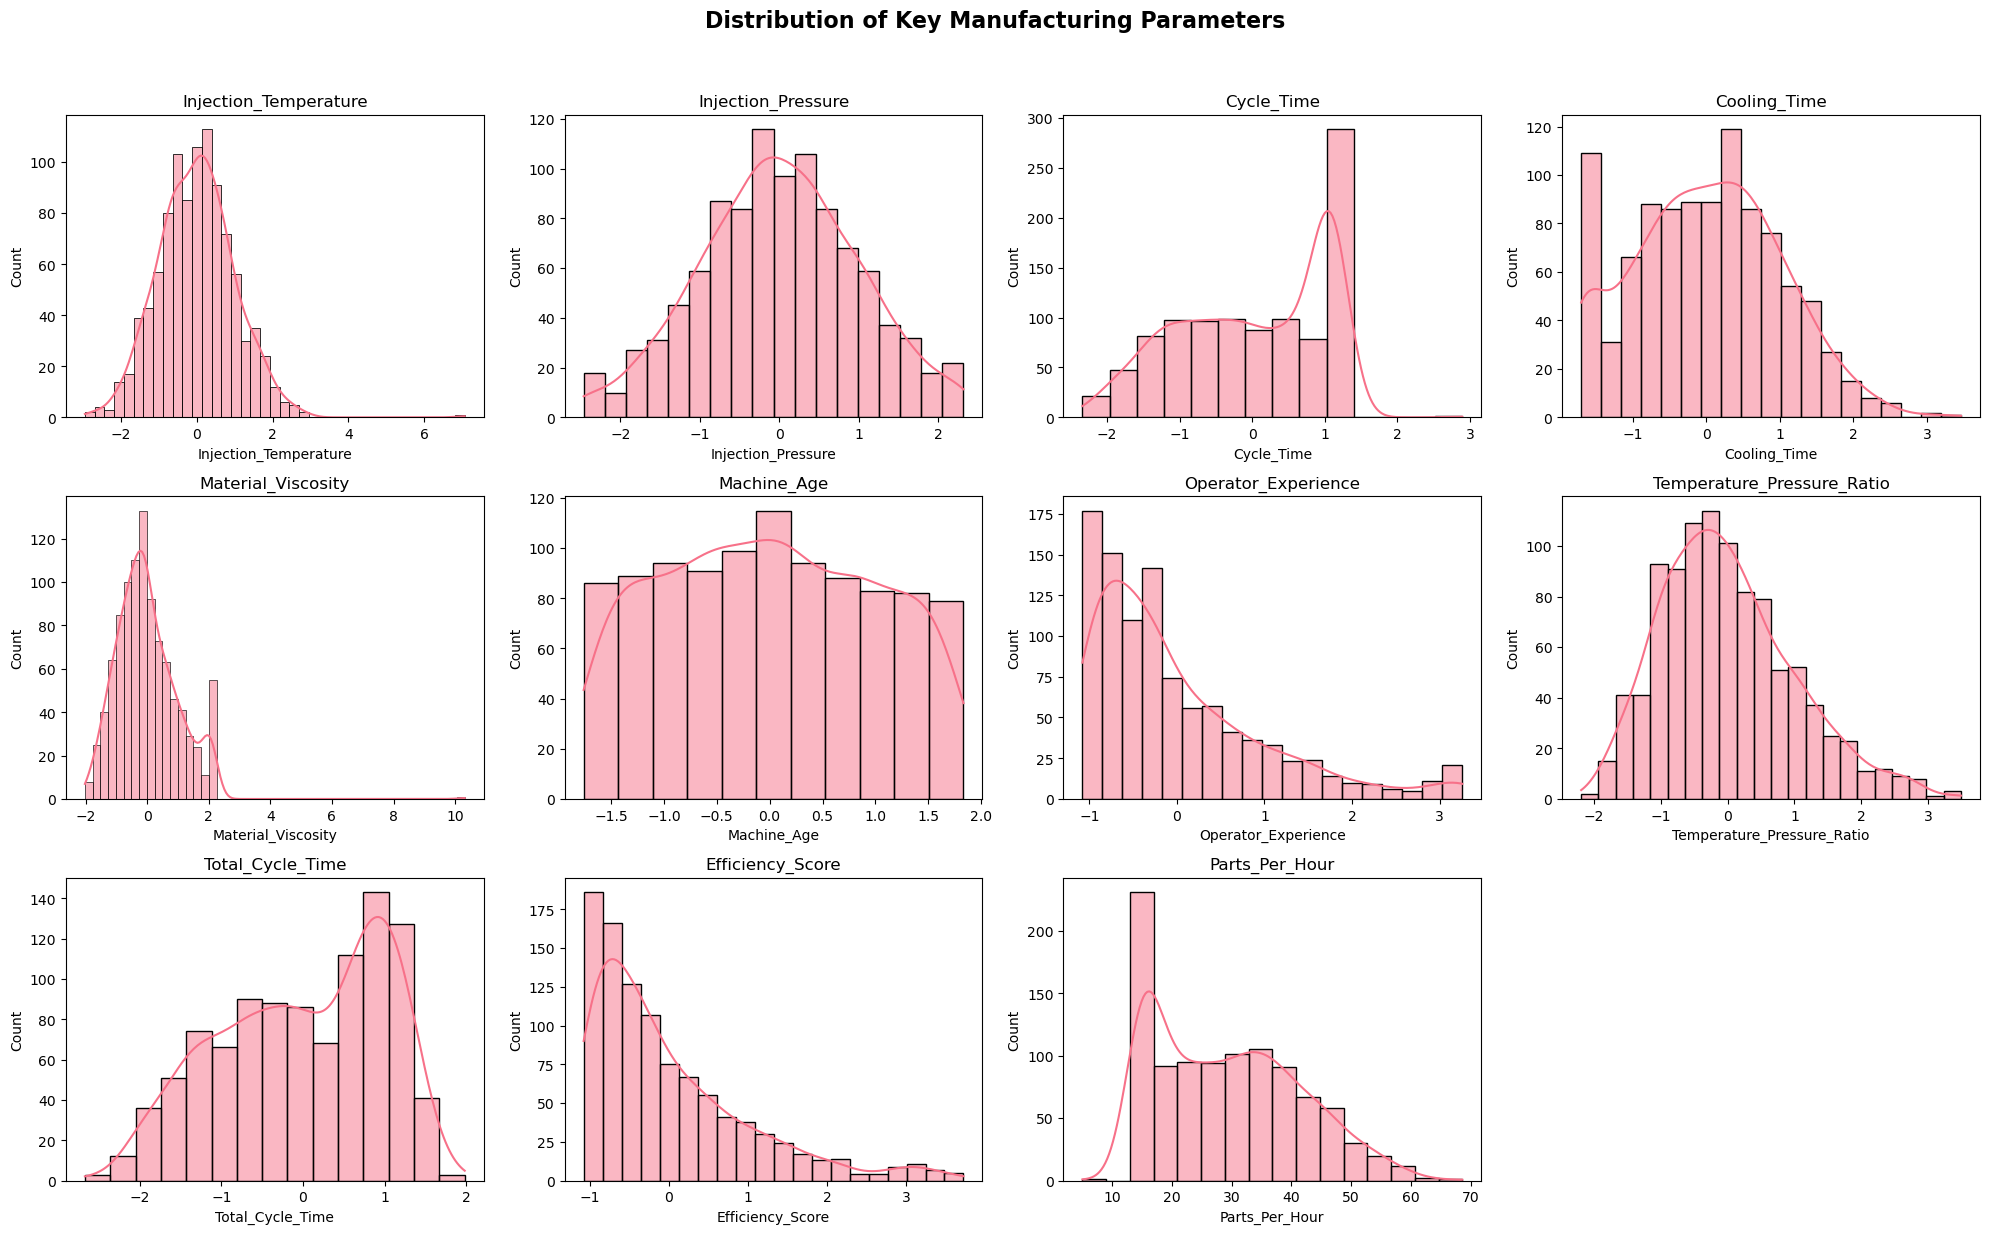

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns you want to visualize
cols = [
    'Injection_Temperature','Injection_Pressure','Cycle_Time','Cooling_Time',
    'Material_Viscosity','Machine_Age','Operator_Experience','Temperature_Pressure_Ratio','Total_Cycle_Time',
    'Efficiency_Score','Parts_Per_Hour'
]

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Distribution of Key Manufacturing Parameters', fontsize=16, fontweight='bold')

axes = axes.flatten()  # flatten to loop easily

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hide any extra subplots if cols < 16
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for main title
plt.show()


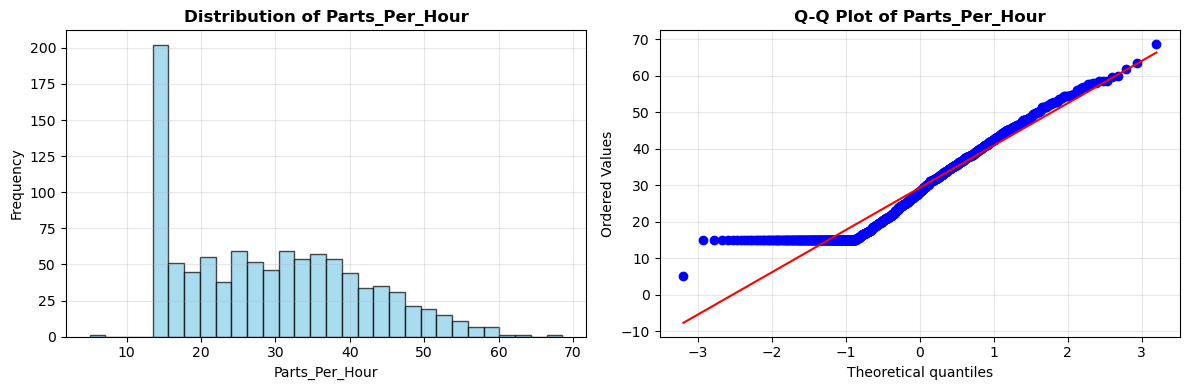


Target Variable (Parts_Per_Hour) Statistics:
Mean: 29.30
Median: 28.20
Std: 11.96
Min: 5.00
Max: 68.60


In [44]:
# Target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df[target_variable], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {target_variable}', fontweight='bold')
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
stats.probplot(df[target_variable], dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {target_variable}', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTarget Variable ({target_variable}) Statistics:")
print(f"Mean: {df[target_variable].mean():.2f}")
print(f"Median: {df[target_variable].median():.2f}")
print(f"Std: {df[target_variable].std():.2f}")
print(f"Min: {df[target_variable].min():.2f}")
print(f"Max: {df[target_variable].max():.2f}")


Calculating correlations...


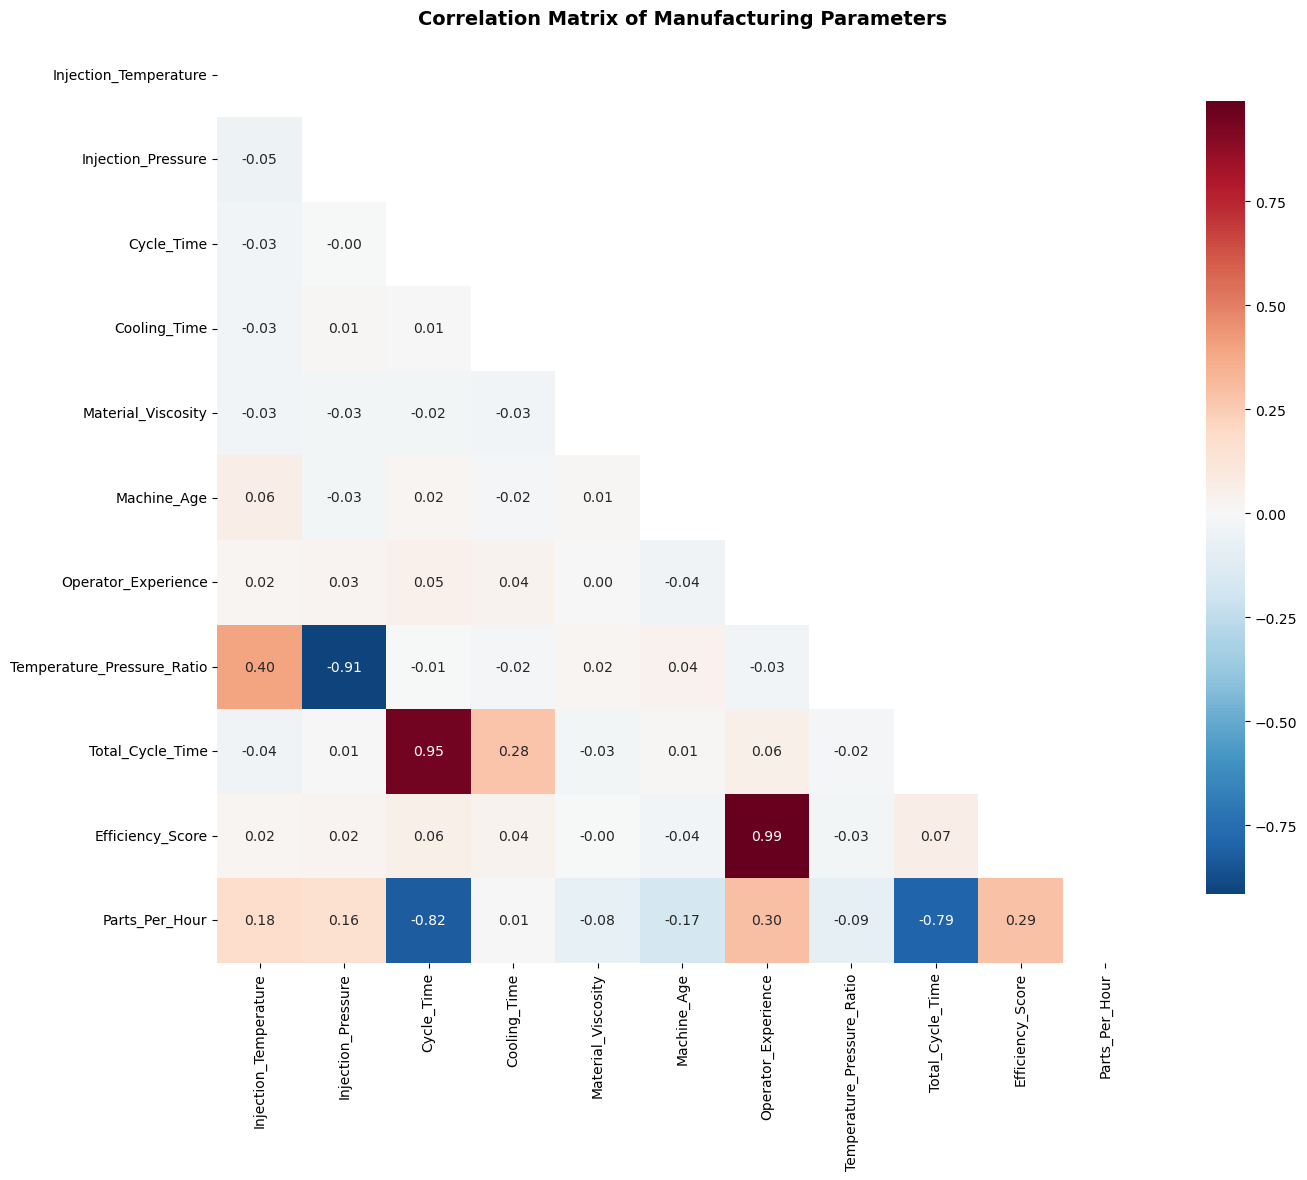

In [45]:
# Correlation Analysis
print("\nCalculating correlations...")
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, mask=mask, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Manufacturing Parameters', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
# Top correlations with target variable
target_correlations = correlation_matrix[target_variable].abs().sort_values(ascending=False)
print(f"\nTop 10 correlations with {target_variable}:")
print(target_correlations.head(11)[1:])  # Exclude self-correlation


Top 10 correlations with Parts_Per_Hour:
Cycle_Time                    0.819446
Total_Cycle_Time              0.792862
Operator_Experience           0.297100
Efficiency_Score              0.286794
Injection_Temperature         0.184353
Machine_Age                   0.174518
Injection_Pressure            0.160362
Temperature_Pressure_Ratio    0.086113
Material_Viscosity            0.080036
Cooling_Time                  0.006215
Name: Parts_Per_Hour, dtype: float64


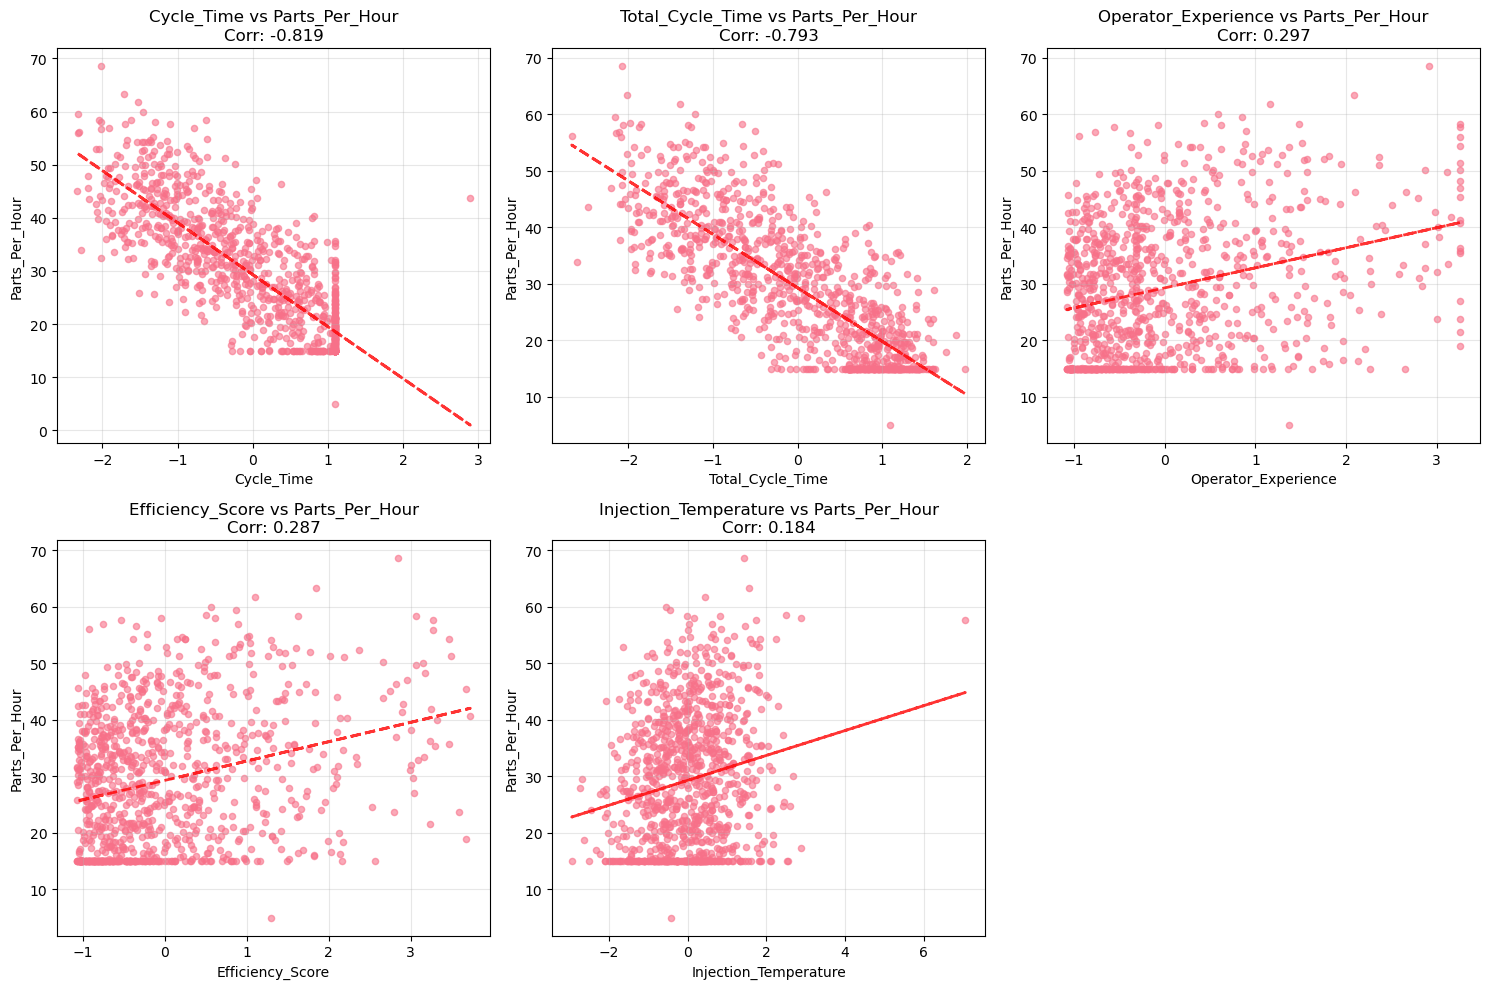

In [47]:
# Scatter plots of top correlated features
top_features = target_correlations.head(6)[1:].index.tolist()  # Top 5 excluding target itself

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df[target_variable], alpha=0.6, s=20)
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.title(f'{feature} vs {target_variable}\nCorr: {correlation_matrix.loc[feature, target_variable]:.3f}')
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df[feature], df[target_variable], 1)
    p = np.poly1d(z)
    plt.plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()


In [48]:
print("\n" + "="*50)
print("STEP 4: DATA PREPROCESSING")
print("="*50)


STEP 4: DATA PREPROCESSING


In [49]:
# Handle outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = {
            'count': len(outliers),
            'percentage': len(outliers) / len(df) * 100,
            'bounds': (lower_bound, upper_bound)
        }
    return outliers_info

outliers_info = detect_outliers_iqr(df, numerical_cols)

print("Outlier Detection (IQR Method):")
for col, info in outliers_info.items():
    if info['count'] > 0:
        print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")

Outlier Detection (IQR Method):
Injection_Temperature: 9 outliers (0.90%)
Cooling_Time: 3 outliers (0.30%)
Material_Viscosity: 1 outliers (0.10%)
Operator_Experience: 48 outliers (4.80%)
Temperature_Pressure_Ratio: 17 outliers (1.70%)
Efficiency_Score: 40 outliers (4.00%)


In [50]:
#Cap the outliers

print("Shape of DataFrame BEFORE capping:", df.shape)

# Handle outliers by capping them at the IQR bounds
for col, info in outliers_info.items():
    if info['count'] > 0:
        lower_bound = info['bounds'][0]
        upper_bound = info['bounds'][1]
        
        # Cap the values
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        
        print(f"Capped outliers in '{col}'.")

print("Shape of DataFrame AFTER capping:", df.shape)

Shape of DataFrame BEFORE capping: (1000, 23)
Capped outliers in 'Injection_Temperature'.
Capped outliers in 'Cooling_Time'.
Capped outliers in 'Material_Viscosity'.
Capped outliers in 'Operator_Experience'.
Capped outliers in 'Temperature_Pressure_Ratio'.
Capped outliers in 'Efficiency_Score'.
Shape of DataFrame AFTER capping: (1000, 23)


In [51]:
feature_cols = [
    "Injection_Temperature", "Injection_Pressure", "Cycle_Time",
    "Cooling_Time", "Material_Viscosity", "Machine_Age",
    "Operator_Experience", "Material_Grade", "Temperature_Pressure_Ratio",
    "Total_Cycle_Time", "Efficiency_Score",
    "Shift_Evening", "Shift_Night",
    "Machine_Type_Type_B", "Machine_Type_Type_C",
    "Day_of_Week_Monday", "Day_of_Week_Saturday", "Day_of_Week_Sunday",
    "Day_of_Week_Thursday", "Day_of_Week_Tuesday", "Day_of_Week_Wednesday"
]

In [53]:
# Prepare data for modeling
X = df[feature_cols]
y = df[target_variable]

In [55]:
print(f"\nFinal feature set: {len(feature_cols)} features")
print(f"Target variable: {target_variable}")
print(f"Dataset shape: {X.shape}")


Final feature set: 21 features
Target variable: Parts_Per_Hour
Dataset shape: (1000, 21)


In [58]:
print("\n" + "="*50)
print("STEP 5: MODEL BUILDING AND TRAINING")
print("="*50)


STEP 5: MODEL BUILDING AND TRAINING


In [67]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 800 samples
Test set: 200 samples


In [69]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")

Features scaled using StandardScaler


In [71]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [73]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Predictions generated for both training and test sets")

Predictions generated for both training and test sets


In [75]:
print("\n" + "="*50)
print("STEP 6: MODEL EVALUATION AND PERFORMANCE ANALYSIS")
print("="*50)


STEP 6: MODEL EVALUATION AND PERFORMANCE ANALYSIS


In [77]:
# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("MODEL PERFORMANCE METRICS:")
print("="*30)
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

MODEL PERFORMANCE METRICS:
Training R²: 0.9277
Test R²: 0.9184
Training RMSE: 3.2425
Test RMSE: 3.2636
Training MAE: 2.5268
Test MAE: 2.6172


In [79]:
# Check for overfitting
print(f"\nModel Assessment:")
if abs(train_r2 - test_r2) < 0.05:
    print("✓ Good fit - minimal overfitting detected")
elif train_r2 - test_r2 > 0.1:
    print("⚠ Potential overfitting detected")
else:
    print("✓ Model appears to generalize well")


Model Assessment:
✓ Good fit - minimal overfitting detected


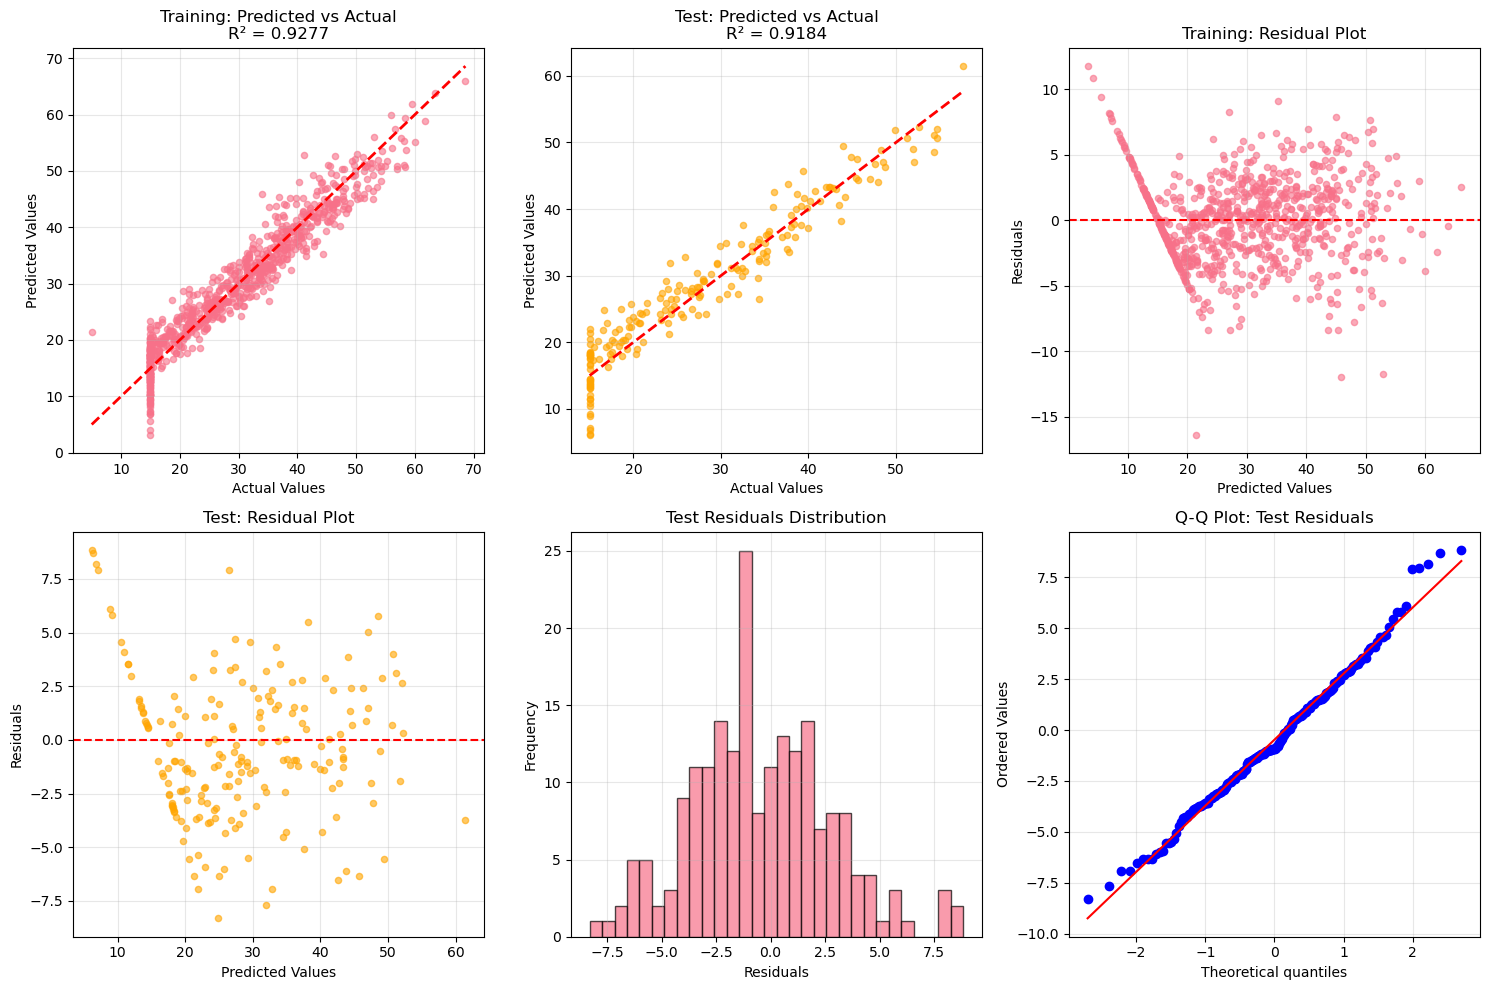

In [81]:
# Visualization of results
plt.figure(figsize=(15, 10))

# 1. Predicted vs Actual (Training)
plt.subplot(2, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, s=20)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Training: Predicted vs Actual\nR² = {train_r2:.4f}')
plt.grid(True, alpha=0.3)

# 2. Predicted vs Actual (Test)
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, s=20, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Test: Predicted vs Actual\nR² = {test_r2:.4f}')
plt.grid(True, alpha=0.3)

# 3. Residuals (Training)
plt.subplot(2, 3, 3)
residuals_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuals_train, alpha=0.6, s=20)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training: Residual Plot')
plt.grid(True, alpha=0.3)

# 4. Residuals (Test)
plt.subplot(2, 3, 4)
residuals_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuals_test, alpha=0.6, s=20, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test: Residual Plot')
plt.grid(True, alpha=0.3)

# 5. Residuals distribution
plt.subplot(2, 3, 5)
plt.hist(residuals_test, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Test Residuals Distribution')
plt.grid(True, alpha=0.3)

# 6. Q-Q plot of residuals
plt.subplot(2, 3, 6)
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q Plot: Test Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [82]:
# Get the coefficients from the trained model
coefficients = model.coef_

# Get the feature names from your DataFrame
feature_names = X.columns

# Create a DataFrame to display the features and their coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients to see the most influential features
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the resulting DataFrame
print(coeff_df)

                       Feature  Coefficient  Abs_Coefficient
9             Total_Cycle_Time   -10.071909        10.071909
10            Efficiency_Score     3.527885         3.527885
3                 Cooling_Time     2.700663         2.700663
0        Injection_Temperature     2.352260         2.352260
5                  Machine_Age    -1.811809         1.811809
14         Machine_Type_Type_C    -1.698375         1.698375
12                 Shift_Night    -1.592293         1.592293
13         Machine_Type_Type_B    -1.183165         1.183165
1           Injection_Pressure     1.051160         1.051160
4           Material_Viscosity    -1.033761         1.033761
8   Temperature_Pressure_Ratio    -1.015147         1.015147
7               Material_Grade     0.998927         0.998927
11               Shift_Evening    -0.785191         0.785191
20       Day_of_Week_Wednesday     0.617049         0.617049
2                   Cycle_Time    -0.582229         0.582229
6          Operator_Expe

In [85]:
print("\n" + "="*50)
print("STEP 7: MANUFACTURING INSIGHTS AND FEATURE INTERPRETATION")
print("="*50)


STEP 7: MANUFACTURING INSIGHTS AND FEATURE INTERPRETATION


In [87]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("FEATURE IMPORTANCE (Based on Coefficient Magnitude):")
print("="*55)
for i, row in feature_importance.head(15).iterrows():
    direction = "↑" if row['Coefficient'] > 0 else "↓"
    print(f"{row['Feature']:<30} {direction} {row['Coefficient']:>8.4f}")

FEATURE IMPORTANCE (Based on Coefficient Magnitude):
Total_Cycle_Time               ↓ -10.0719
Efficiency_Score               ↑   3.5279
Cooling_Time                   ↑   2.7007
Injection_Temperature          ↑   2.3523
Machine_Age                    ↓  -1.8118
Machine_Type_Type_C            ↓  -1.6984
Shift_Night                    ↓  -1.5923
Machine_Type_Type_B            ↓  -1.1832
Injection_Pressure             ↑   1.0512
Material_Viscosity             ↓  -1.0338
Temperature_Pressure_Ratio     ↓  -1.0151
Material_Grade                 ↑   0.9989
Shift_Evening                  ↓  -0.7852
Day_of_Week_Wednesday          ↑   0.6170
Cycle_Time                     ↓  -0.5822


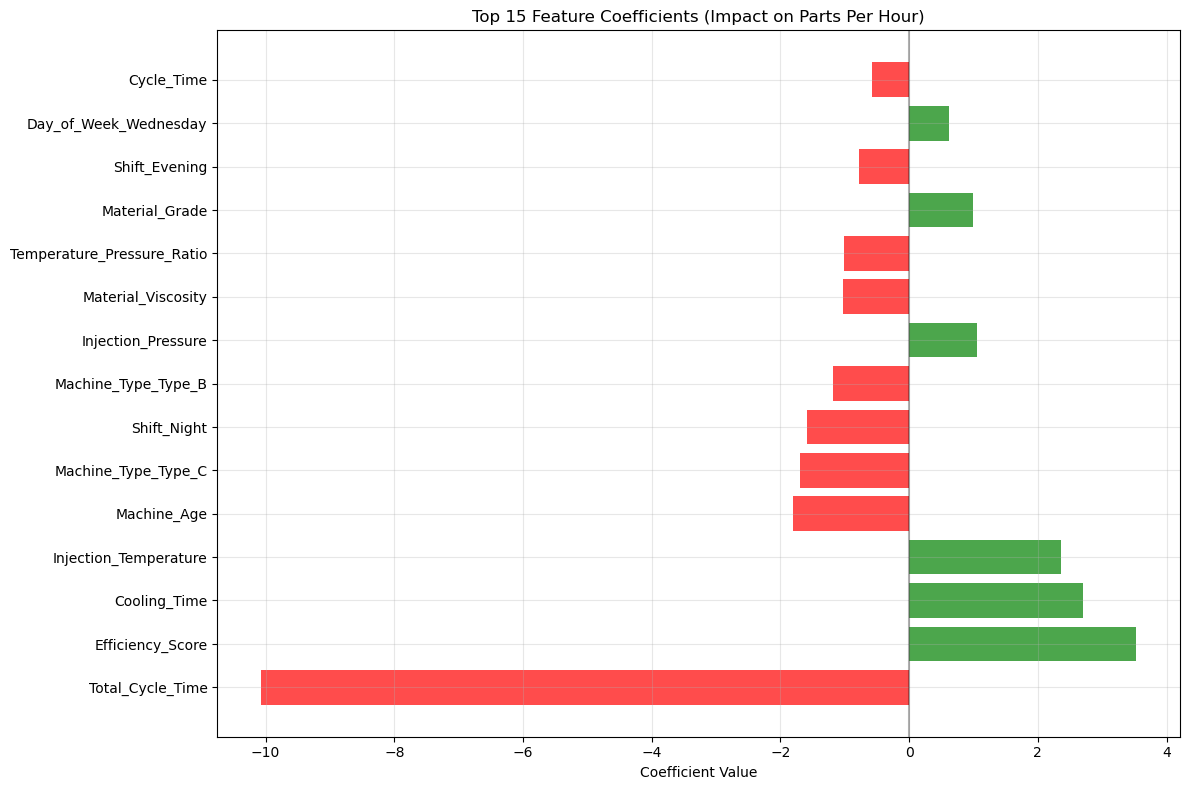

In [89]:
# Visualization of feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]

plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Coefficients (Impact on Parts Per Hour)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [91]:
# Business insights
print("\nKEY BUSINESS INSIGHTS:")
print("="*25)

# Find most impactful positive and negative features
most_positive = feature_importance.loc[feature_importance['Coefficient'].idxmax()]
most_negative = feature_importance.loc[feature_importance['Coefficient'].idxmin()]

print(f" Most POSITIVE impact: {most_positive['Feature']} (coef: {most_positive['Coefficient']:.4f})")
print(f" Most NEGATIVE impact: {most_negative['Feature']} (coef: {most_negative['Coefficient']:.4f})")

# Optimal operating ranges analysis
print("\nOPTIMAL OPERATING RANGES:")
print("="*30)

high_performers = df[df[target_variable] > df[target_variable].quantile(0.8)]
low_performers = df[df[target_variable] < df[target_variable].quantile(0.2)]

key_process_params = ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time']

for param in key_process_params:
    high_mean = high_performers[param].mean()
    low_mean = low_performers[param].mean()
    high_std = high_performers[param].std()
    
    print(f"{param}:")
    print(f"  High performers: {high_mean:.2f} ± {high_std:.2f}")
    print(f"  Low performers:  {low_mean:.2f}")
    print(f"  Recommendation: Target {high_mean:.2f} (±{high_std:.2f})")
    print()


KEY BUSINESS INSIGHTS:
 Most POSITIVE impact: Efficiency_Score (coef: 3.5279)
 Most NEGATIVE impact: Total_Cycle_Time (coef: -10.0719)

OPTIMAL OPERATING RANGES:
Injection_Temperature:
  High performers: 0.30 ± 0.92
  Low performers:  -0.21
  Recommendation: Target 0.30 (±0.92)

Injection_Pressure:
  High performers: 0.28 ± 0.94
  Low performers:  -0.22
  Recommendation: Target 0.28 (±0.94)

Cycle_Time:
  High performers: -1.18 ± 0.64
  Low performers:  0.99
  Recommendation: Target -1.18 (±0.64)

Cooling_Time:
  High performers: -0.02 ± 1.01
  Low performers:  -0.04
  Recommendation: Target -0.02 (±1.01)



In [93]:
print("\n" + "="*50)
print("STEP 8: PRODUCTION OPTIMIZATION RECOMMENDATIONS")
print("="*50)


STEP 8: PRODUCTION OPTIMIZATION RECOMMENDATIONS


In [95]:
# Priority 1: Most impactful parameters
print("PRIORITY 1 - Critical Parameter Optimization:")
top_3_features = feature_importance.head(3)
for i, row in top_3_features.iterrows():
    impact_type = "INCREASE" if row['Coefficient'] > 0 else "DECREASE"
    print(f"• {impact_type} {row['Feature']} (Impact: {row['Coefficient']:+.4f})")

print("\nPRIORITY 2 - Machine Settings:")
temp_impact = feature_importance[feature_importance['Feature'] == 'Injection_Temperature']['Coefficient'].values
pressure_impact = feature_importance[feature_importance['Feature'] == 'Injection_Pressure']['Coefficient'].values

if len(temp_impact) > 0:
    temp_rec = "increase" if temp_impact[0] > 0 else "decrease"
    print(f"• {temp_rec.title()} injection temperature for better output")

if len(pressure_impact) > 0:
    pressure_rec = "increase" if pressure_impact[0] > 0 else "decrease"
    print(f"• {pressure_rec.title()} injection pressure for better output")

print("\nPRIORITY 3 - Maintenance and Training:")
maint_features = [f for f in feature_cols if 'Maintenance' in f or 'Experience' in f]
for feat in maint_features:
    coef = feature_importance[feature_importance['Feature'] == feat]['Coefficient'].values
    if len(coef) > 0:
        if coef[0] > 0:
            print(f"• Focus on improving {feat.replace('_', ' ').lower()}")

PRIORITY 1 - Critical Parameter Optimization:
• DECREASE Total_Cycle_Time (Impact: -10.0719)
• INCREASE Efficiency_Score (Impact: +3.5279)
• INCREASE Cooling_Time (Impact: +2.7007)

PRIORITY 2 - Machine Settings:
• Increase injection temperature for better output
• Increase injection pressure for better output

PRIORITY 3 - Maintenance and Training:
• Focus on improving operator experience


In [97]:
print("\n" + "="*50)
print("STEP 9: MODEL VALIDATION AND BUSINESS IMPACT")
print("="*50)


STEP 9: MODEL VALIDATION AND BUSINESS IMPACT


In [99]:
# Linear regression assumptions check
print("LINEAR REGRESSION ASSUMPTIONS CHECK:")
print("="*40)

# 1. Linearity (already shown in scatter plots)
print("✓ Linearity: Verified through scatter plots")

# 2. Independence (assumed for manufacturing data)
print("✓ Independence: Assumed for time-series manufacturing data")

# 3. Homoscedasticity (constant variance)
from scipy.stats import levene
residuals_split = np.array_split(residuals_test, 3)
levene_stat, levene_p = levene(*residuals_split)
if levene_p > 0.05:
    print("✓ Homoscedasticity: Residuals show constant variance")
else:
    print("⚠ Homoscedasticity: Evidence of non-constant variance")

# 4. Normality of residuals
shapiro_stat, shapiro_p = stats.shapiro(residuals_test[:min(len(residuals_test), 5000)])  # Shapiro-Wilk test
if shapiro_p > 0.05:
    print("✓ Normality: Residuals are normally distributed")
else:
    print("⚠ Normality: Residuals deviate from normal distribution")

# Business impact estimation
print("\nBUSINESS IMPACT ESTIMATION:")
print("="*30)

current_avg_output = df[target_variable].mean()
potential_improvement = test_rmse  # Conservative estimate

print(f"Current average output: {current_avg_output:.2f} parts/hour")
print(f"Model prediction accuracy: ±{test_rmse:.2f} parts/hour")
print(f"Potential improvement with optimization: {potential_improvement:.2f} parts/hour")

# Cost savings estimation (example calculation)
hours_per_day = 24
days_per_year = 365
cost_per_part_improvement = 0.10  # Example: $0.10 value per additional part

potential_additional_parts_per_day = potential_improvement * hours_per_day
annual_additional_parts = potential_additional_parts_per_day * days_per_year
estimated_annual_savings = annual_additional_parts * cost_per_part_improvement

print(f"\nESTIMATED ANNUAL IMPACT:")
print(f"Additional parts/day: {potential_additional_parts_per_day:,.0f}")
print(f"Additional parts/year: {annual_additional_parts:,.0f}")
print(f"Estimated annual value: ${estimated_annual_savings:,.0f}")

print("\nMODEL LIMITATIONS:")
print("="*20)
print("• Linear relationship assumption may not capture complex interactions")
print("• Model performance depends on data quality and feature engineering")
print("• External factors (supply chain, market demand) not considered")
print("• Regular retraining needed as manufacturing conditions change")

LINEAR REGRESSION ASSUMPTIONS CHECK:
✓ Linearity: Verified through scatter plots
✓ Independence: Assumed for time-series manufacturing data
✓ Homoscedasticity: Residuals show constant variance
✓ Normality: Residuals are normally distributed

BUSINESS IMPACT ESTIMATION:
Current average output: 29.30 parts/hour
Model prediction accuracy: ±3.26 parts/hour
Potential improvement with optimization: 3.26 parts/hour

ESTIMATED ANNUAL IMPACT:
Additional parts/day: 78
Additional parts/year: 28,589
Estimated annual value: $2,859

MODEL LIMITATIONS:
• Linear relationship assumption may not capture complex interactions
• Model performance depends on data quality and feature engineering
• External factors (supply chain, market demand) not considered
• Regular retraining needed as manufacturing conditions change


In [295]:
#Saving Model
print("\n" + "="*80)
print("ANALYSIS COMPLETE - MODEL READY FOR DEPLOYMENT")
print("="*80)

# Save model and scaler for deployment
import joblib

joblib.dump(model, 'manufacturing_prediction_model3.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
feature_importance.to_csv('feature_importance2.csv', index=False)

print("\nModel artifacts saved:")
print("• manufacturing_prediction_model.pkl")
print("• feature_scaler.pkl") 
print("• feature_importance.csv")


ANALYSIS COMPLETE - MODEL READY FOR DEPLOYMENT

Model artifacts saved:
• manufacturing_prediction_model.pkl
• feature_scaler.pkl
• feature_importance.csv


In [307]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          1000 non-null   float64
 6   Machine_Age                 1000 non-null   float64
 7   Operator_Experience         1000 non-null   float64
 8   Material_Grade              1000 non-null   int64  
 9   Temperature_Pressure_Ratio  1000 non-null   float64
 10  Total_Cycle_Time            1000 non-null   float64
 11  Efficiency_Score            1000 non-null   float64
 12  Parts_Per_Hour              1000 non-null   float64
 13  Shift_Evening      

In [101]:
#test
import joblib
import numpy as np

# Load model and scaler
model = joblib.load("manufacturing_prediction_model2.pkl")
scaler = joblib.load("feature_scaler.pkl")  # Make sure this is the one trained on numeric_features only

# Numeric features (order must match training)
numeric_features = [
    "Injection_Temperature",
    "Injection_Pressure",
    "Cycle_Time",
    "Cooling_Time",
    "Material_Viscosity",
    "Machine_Age",
    "Operator_Experience",
    "Temperature_Pressure_Ratio",
    "Total_Cycle_Time",
    "Efficiency_Score"
]

# Example numeric inputs (candidates)
candidates = [
    [220.0, 30.0, 40.0, 14.0, 380.0, 5.0, 10.0, 1.6, 42.0, 0.08],
    [210.0, 25.0, 35.0, 12.0, 360.0, 3.0, 12.0, 1.7, 38.0, 0.07],
    [230.0, 28.0, 45.0, 15.0, 400.0, 6.0, 15.0, 1.5, 44.0, 0.09]
]

# Fixed categorical features
shift = "Day"
machine = "Type_A"
material = "Standard"
day = "Friday"

# Encode categoricals (same as Flask)
shift_encoded = [1 if shift == "Evening" else 0,
                 1 if shift == "Night" else 0]

machine_encoded = [1 if machine == "Type_B" else 0,
                   1 if machine == "Type_C" else 0]

day_encoded = [
    1 if day == "Monday" else 0,
    1 if day == "Saturday" else 0,
    1 if day == "Sunday" else 0,
    1 if day == "Thursday" else 0,
    1 if day == "Tuesday" else 0,
    1 if day == "Wednesday" else 0
]

material_map = {"Standard": 0, "Premium": 1, "Economy": 2}
material_encoded = [material_map.get(material, 0)]

# Test each candidate
for i, candidate in enumerate(candidates, 1):
    # Scale numeric inputs only
    scaled_numeric = scaler.transform([candidate])[0]
    
    # Combine scaled numerics with encoded categoricals
    features = np.array(list(scaled_numeric) + material_encoded + shift_encoded + machine_encoded + day_encoded).reshape(1, -1)
    
    # Predict
    prediction = model.predict(features)[0]
    
    print(f"Candidate {i}: {prediction:.2f} Parts Per Hour | Numeric Inputs: {candidate}")


Candidate 1: 141.68 Parts Per Hour | Numeric Inputs: [220.0, 30.0, 40.0, 14.0, 380.0, 5.0, 10.0, 1.6, 42.0, 0.08]
Candidate 2: 140.53 Parts Per Hour | Numeric Inputs: [210.0, 25.0, 35.0, 12.0, 360.0, 3.0, 12.0, 1.7, 38.0, 0.07]
Candidate 3: 139.77 Parts Per Hour | Numeric Inputs: [230.0, 28.0, 45.0, 15.0, 400.0, 6.0, 15.0, 1.5, 44.0, 0.09]
